# Social Media Analytics Assignment 2
## MSBA Spring 2018
### Ryan Conklin, Reed Dalton, Gihani Dissanayake, Ali Prasla, Jake Schmidt

In [1]:
import glob, pandas as pd
data = [{
  'date': pd.to_datetime(filename.split(' ')[0].lstrip('speeches/').strip('\\')),
  'speaker': filename.rstrip('.txt').split(' ', 1)[1],
  'text': open(filename, 'rb').readline().decode('cp1252')
} for filename in glob.glob('speeches/*.txt')]
speeches = pd.DataFrame(data)
speeches = speeches.set_index(['speaker', 'date'])
speeches.head()

text
speaker           date                                                         
George Washington 1789-04-30  Fellow Citizens of the Senate and the House of...
                  1789-10-03  Whereas it is the duty of all Nations to ackno...
                  1790-01-08  Fellow Citizens of the Senate and House of Rep...
                  1790-12-08  Fellow citizens of the Senate and House of Rep...
                  1790-12-29  I the President of the United States by my own...

# Task A
Choose a reasonable number of topics for this corpus. One way to think about topics is to consider the number of issues that may have been important in the past as well as those that may have come up over the centuries. Provide a brief explanation of how you chose this number.

#### To evalate a reasonable number of topics, we cross validated the LDA of Part B with 10, 15, 20, and 25 components/topics, the outputs are shown in the plots below. 10 topics seemed too few as the first two topics carried an unreaonably high proportion of the of the 633 speeches. Conversely, 25 components seemed to be too many, as the last 10 or so topics were highly sparse and seemed superfluous. A more ideal combination of topics is with 15 or 20 topics, at which the spreadof speeches appears more reasonably distrubted. Since they appear comparable in performance, we choose to go with the simpler option of 15 topics.

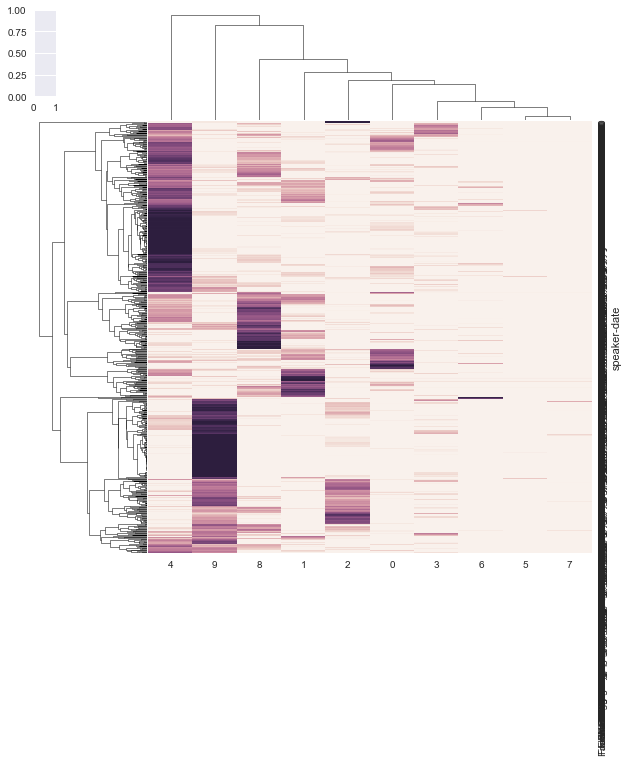

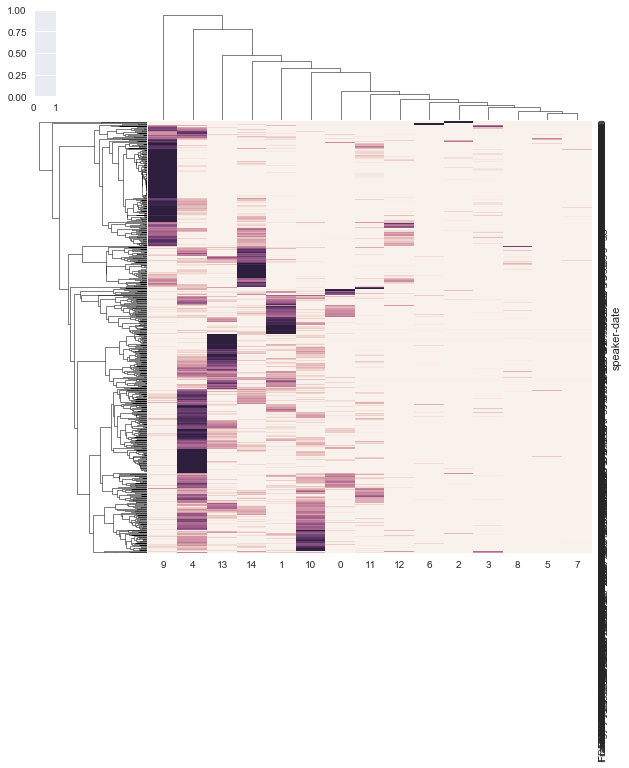

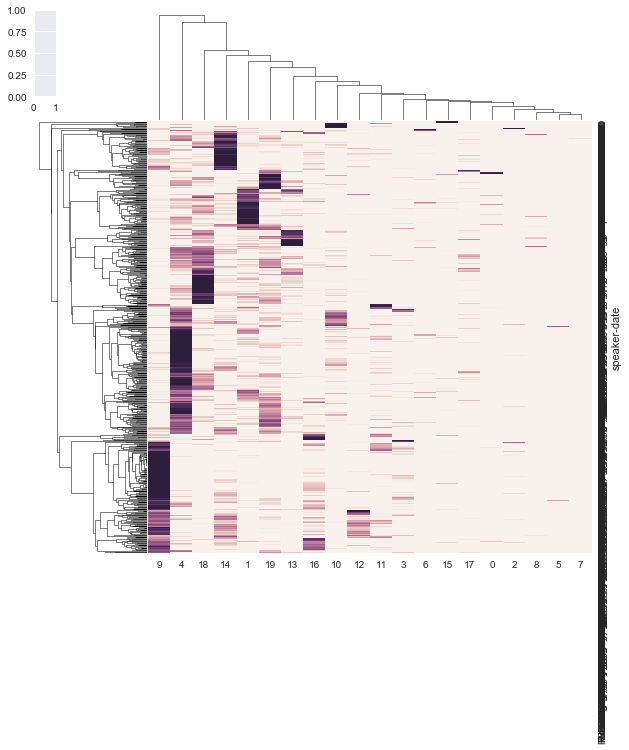

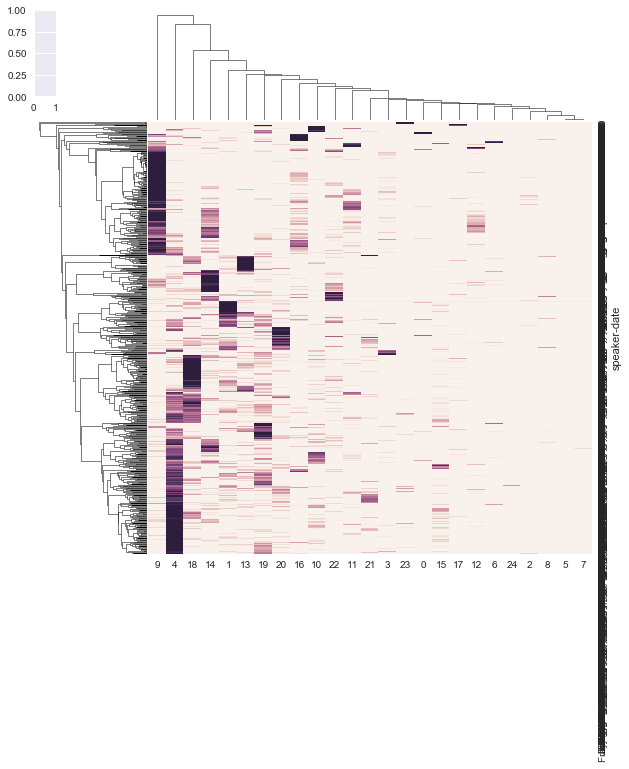

In [2]:
from IPython.display import display, Image
display(Image(filename='components10.png'))
display(Image(filename='components15.png'))
display(Image(filename='components20.png'))
display(Image(filename='components25.png'))

In [3]:
N_TOPICS = 15

# Task B
Now perform a topic modeling exercise with LDA. Show the word distributions for each topic as well as topic distributions for each speech. Do you see any shifts over time? Explain.

In [4]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
  CountVectorizer(stop_words='english'),
  LDA(n_components=N_TOPICS, learning_method='batch', n_jobs=-1, max_iter=25, random_state=42)
).fit(speeches.text)

In [5]:
import numpy as np
n_words = 10
vocab = pipe.steps[0][1].get_feature_names()
topic_words = {}
for topic, comp in enumerate(pipe.steps[1][1].components_):   
    word_idx = np.argsort(comp)[::-1][:n_words]
    # store the words most relevant to the topic
    topic_words[topic] = [vocab[i] for i in word_idx]
pd.DataFrame(topic_words).T

,0,1,2,3,4,5,6,7,8,9
0,vietnam,president,south,think,viet,nam,north,people,vietnamese,war
1,president,mr,think,people,going,say,don,time,want,know
2,watergate,united,states,shall,said,british,act,vessels,day,transcripts
3,germany,german,conference,united,states,poland,people,great,state,government
4,world,people,nation,peace,great,men,freedom,war,america,new
5,beloved,press,cherokees,gun,newspaper,agent,remonstrance,boats,information,cattle
6,lebanon,country,israel,schedule,army,tariff,men,rates,marines,union
7,bank,banks,act,stock,stockholders,power,notes,privileges,necessary,corporation
8,statute,trust,business,law,companies,capital,company,common,court,purpose
9,states,government,united,congress,public,great,country,citizens,state,shall


C:\Users\Gihani Dissanayake\Anaconda2\envs\py35\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


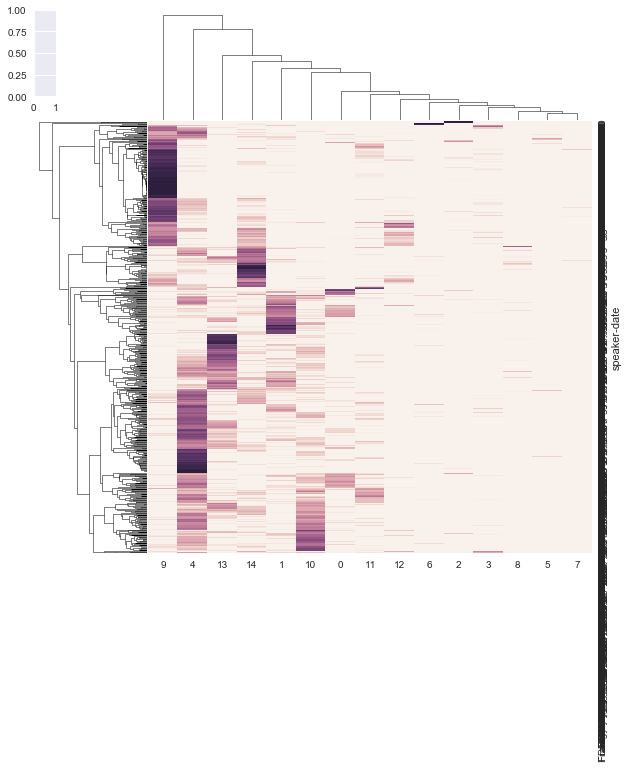

In [6]:
import matplotlib.pyplot as plt, seaborn as sns
x = pd.DataFrame(pipe.transform(speeches.text), index=speeches.index)
sns.clustermap(x, cbar=False)
plt.show()

# Task C
In terms of topics addressed “heavily” in a speech, which 3 former presidents does President Trump share the highest similarity with? How did you arrive at your conclusion?

In [7]:
xx = x.reset_index(1, True)
xx = xx.groupby(xx.index).mean().T.corr() # Pearson correlation
xx.loc[:] = [xx.columns[np.argsort(r)[::-1]] for r in xx.values] # sort by corr
xx.columns = range(len(xx)) # reset column names
xx.loc['Donald Trump']

0                  Donald Trump
1                  Barack Obama
2                  Jimmy Carter
3                  Bill Clinton
4             George H. W. Bush
5          Ronald Wilson Reagan
6         Richard Milhous Nixon
7                George W. Bush
8           Gerald Rudolph Ford
9               Harry S. Truman
10        Lyndon Baines Johnson
11      John Fitzgerald Kennedy
12     Franklin Delano Roosevel
13      Dwight David Eisenhower
14      Warren Gamaliel Harding
15       William Henry Harrison
16            Theodore Roosevel
17              Calvin Coolidge
18         Herbert Clark Hoover
19                 James Monroe
20             Thomas Jefferson
21               Woodrow Wilson
22            George Washington
23              Abraham Lincoln
24             Martin Van Buren
25                   John Adams
26               Zachary Taylor
27              James Knox Polk
28                James Madison
29             Millard Fillmore
30            John Quincy Adams
31      

# Task D
In terms of his own speeches, do you see President Trump shifting the emphasis on certain topics over time? Explain your response.

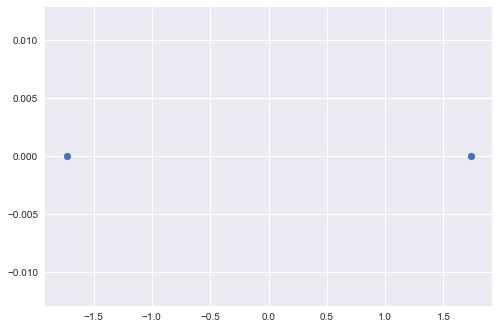

NameError: name 'topics' is not defined

In [8]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
test = pd.DataFrame({'speaker':['Donald Trump','Donald Trump'],'Date':[pd.to_datetime('01/01/2018'),pd.to_datetime('02/01/2018')], 'Topic One':[.5,.1],'Topic Two': [.2,.04], 'Topic Three': [.1,1]})
col_order = ['Date','speaker']
col_order.extend(list(filter(lambda x: x not in ['Date','speaker'],test.columns)))

test = test[col_order]
topic_names = list(filter(lambda x: x not in ['Date','speaker'],test.columns))


#all topics compressed
data = StandardScaler().fit_transform(test[topic_names])
pca = PCA(n_components = 2)
d = pca.fit_transform(data)
import matplotlib.pyplot as plt
plt.scatter(d[:,0],d[:,1])
plt.show()


#top n topics
topics

# Task E
If you do a K-means clustering with the same number of clusters as topics, do you see President Trump’s speeches and those of the 3 former presidents you identified in Task C in the same cluster? What was the basis of clustering (e.g., tf-idf, cosine similarity, etc.). Discuss your findings.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Task F
Provide a visualization of both clusters (with colors) and cosine scores using MDS. 